#Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('summer.csv')

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


###1. In how many cities Summer Olympics is held so far?

In [70]:
cities = df['City'].unique()
cities

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [71]:
len(cities)

22

###2. Which sport is having most number of Gold Medals so far? (Top 5)

In [4]:
gold = df[df['Medal'] == 'Gold']
gold

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold
13,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold
...,...,...,...,...,...,...,...,...,...
31145,2012,London,Wrestling,Wrestling Freestyle,"NOROOZI, Omid Haji",IRI,Men,Wg 60 KG,Gold
31149,2012,London,Wrestling,Wrestling Freestyle,"KIM, Hyeonwoo",KOR,Men,Wg 66 KG,Gold
31153,2012,London,Wrestling,Wrestling Freestyle,"VLASOV, Roman",RUS,Men,Wg 74 KG,Gold
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold


In [78]:
unique_gold_meds = pd.DataFrame(gold.groupby(['Year', 'Sport', 'Discipline', 'Gender', 'Event'], as_index=False, sort=True)['Athlete'].count())
unique_gold_meds.sort_values(by='Athlete', ascending=False, inplace=True)
unique_gold_meds.rename(columns= {'Athlete': 'No of Medals'}, inplace=True)
unique_gold_meds

,Year,Sport,Discipline,Gender,Event,No of Medals
275,1908,Gymnastics,Artistic G.,Men,Team Competition,59
187,1904,Football,Football,Men,Football,34
680,1924,Rugby,Rugby,Men,Rugby,29
516,1920,Gymnastics,Artistic G.,Men,Team Competition,28
389,1912,Gymnastics,Artistic G.,Men,"Team, Free System",25
...,...,...,...,...,...,...
1847,1968,Aquatics,Swimming,Women,200M Backstroke,1
1848,1968,Aquatics,Swimming,Women,200M Breaststroke,1
1849,1968,Aquatics,Swimming,Women,200M Butterfly,1
1850,1968,Aquatics,Swimming,Women,200M Freestyle,1


In [79]:
sport_gold = pd.DataFrame(unique_gold_meds.groupby(['Sport'], as_index=False, sort=True)['No of Medals'].count())
sport_gold.sort_values(by='No of Medals', ascending=False, inplace=True)
sport_gold

,Sport,No of Medals
2,Athletics,929
0,Aquatics,680
42,Wrestling,391
17,Gymnastics,323
31,Shooting,258
7,Boxing,239
28,Rowing,239
12,Cycling,224
14,Fencing,200
41,Weightlifting,198


<function matplotlib.pyplot.show>

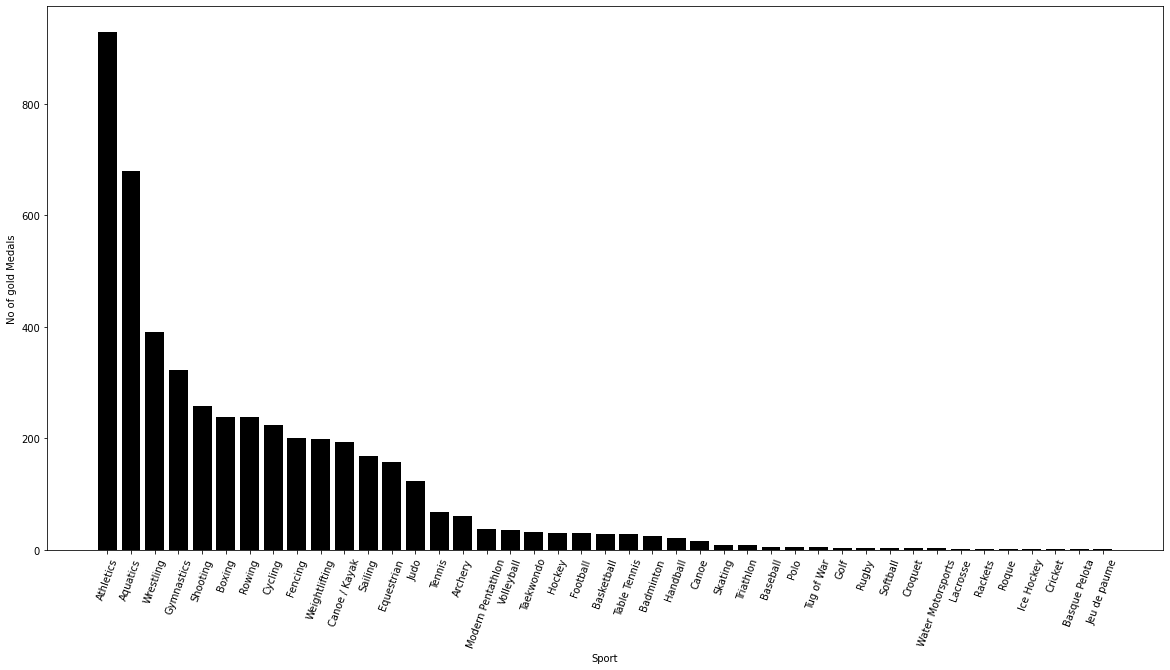

In [77]:
graph = plt.figure(figsize=(20, 10))
plt.bar(sport_gold['Sport'], sport_gold['No of Medals'], color='black')
plt.xlabel('Sport')
plt.ylabel('No of gold Medals')
plt.xticks(rotation=70)
plt.show

###3. Which sport is having most number of medals so far? (Top 5)

In [57]:
unique_meds = pd.DataFrame(df.groupby(['Year', 'Sport', 'Discipline', 'Gender', 'Event', 'Medal'], as_index=False, sort=True)['Athlete'].count())
unique_meds.sort_values(by='Athlete', ascending=False, inplace=True)
unique_meds.rename(columns= {'Athlete': 'No of Medals'}, inplace=True)
unique_meds

,Year,Sport,Discipline,Gender,Event,Medal,No of Medals
788,1908,Gymnastics,Artistic G.,Men,Team Competition,Gold,59
6240,1972,Football,Football,Men,Football,Bronze,36
535,1904,Football,Football,Men,Football,Gold,34
789,1908,Gymnastics,Artistic G.,Men,Team Competition,Silver,32
1955,1924,Rugby,Rugby,Men,Rugby,Silver,30
...,...,...,...,...,...,...,...
5449,1968,Aquatics,Swimming,Women,200M Individual Medley,Silver,1
5450,1968,Aquatics,Swimming,Women,400M Freestyle,Bronze,1
5451,1968,Aquatics,Swimming,Women,400M Freestyle,Gold,1
5452,1968,Aquatics,Swimming,Women,400M Freestyle,Silver,1


In [64]:
sport_med = pd.DataFrame(unique_meds.groupby('Sport', as_index=False, sort=True)['No of Medals'].count())
sport_med.sort_values(by='No of Medals', ascending=False, inplace=True)
sport_med

,Sport,No of Medals
2,Athletics,2776
0,Aquatics,2033
42,Wrestling,1175
17,Gymnastics,924
31,Shooting,772
7,Boxing,714
28,Rowing,714
12,Cycling,667
14,Fencing,598
41,Weightlifting,591


<function matplotlib.pyplot.show>

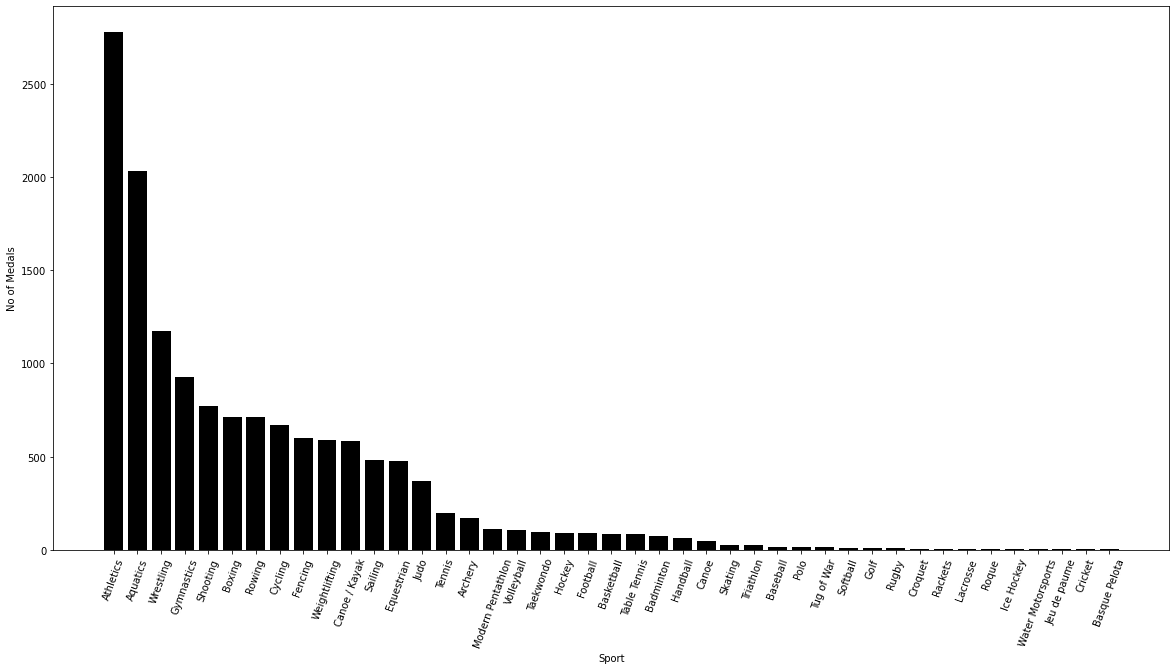

In [65]:
graph = plt.figure(figsize=(20, 10))
plt.bar(sport_med['Sport'], sport_med['No of Medals'], color='black')
plt.xlabel('Sport')
plt.ylabel('No of Medals')
plt.xticks(rotation=70)
plt.show

###4. Which player has won most number of medals? (Top 5)

In [ ]:
play_med = pd.DataFrame(df.groupby('Athlete', as_index=False, sort=True)['Medal'].count())
play_med.sort_values(by='Medal', ascending=False, inplace=True)
play_med

,Athlete,Medal
15702,"PHELPS, Michael",22
11202,"LATYNINA, Larisa",18
511,"ANDRIANOV, Nikolay",15
12476,"MANGIAROTTI, Edoardo",13
14883,"ONO, Takashi",13
...,...,...
8566,"HÜRLIMANN, Ernst",1
8564,"HÜLSENBECK, Sarina",1
8563,"HÜBNER, Frank",1
8562,"HÜBLER, Anna",1


In [ ]:
play_med_20 = play_med.head(20)

<function matplotlib.pyplot.show>

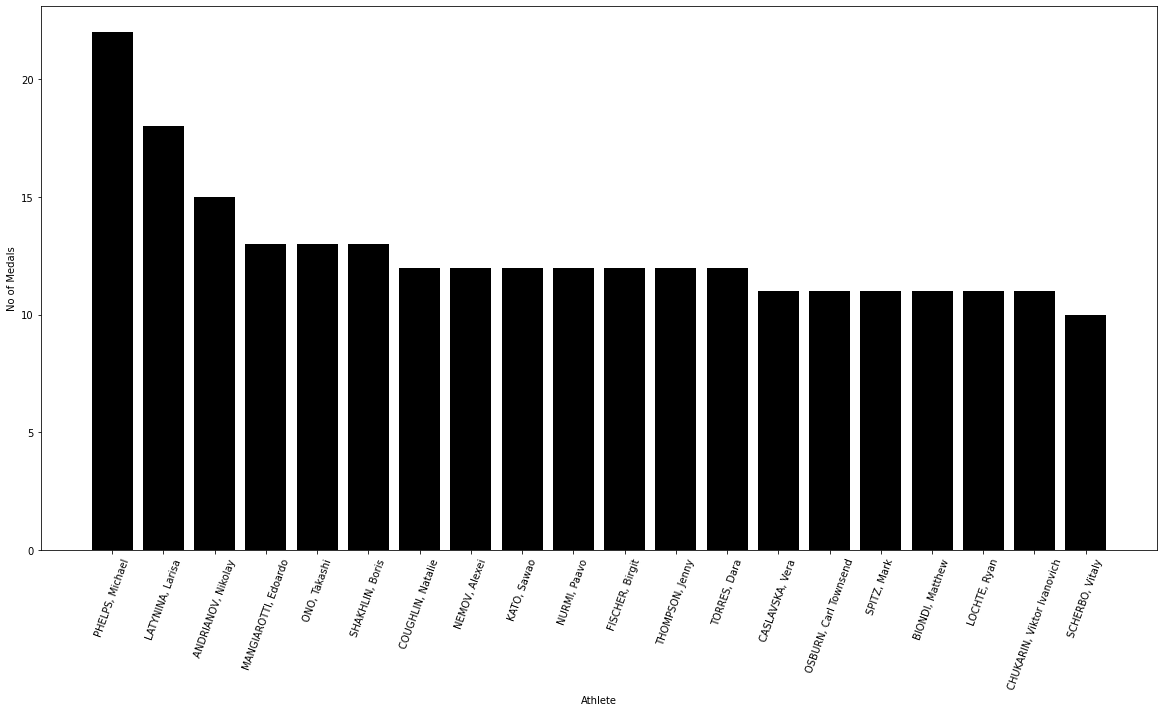

In [ ]:
graph = plt.figure(figsize=(20, 10))
plt.bar(play_med_20['Athlete'], play_med_20['Medal'], color='black')
plt.xlabel('Athlete')
plt.ylabel('No of Medals')
plt.xticks(rotation=70)
plt.show

###5. Which player has won most number Gold Medals of medals? (Top 5)

In [ ]:
play_gold = pd.DataFrame(gold.groupby('Athlete', as_index=False, sort=True)['Medal'].count())
play_gold.sort_values(by='Medal', ascending=False, inplace=True)
play_gold

,Athlete,Medal
5712,"PHELPS, Michael",18
4186,"LEWIS, Carl",9
5332,"NURMI, Paavo",9
6905,"SPITZ, Mark",9
4066,"LATYNINA, Larisa",9
...,...,...
3029,"HORMANN, Raimund",1
3028,"HORKAI, Gyorgy",1
3026,"HOPP, Karl Heinz",1
3024,"HOOPMAN, Beau",1


In [ ]:
play_gold_20 = play_gold.head(20)

<function matplotlib.pyplot.show>

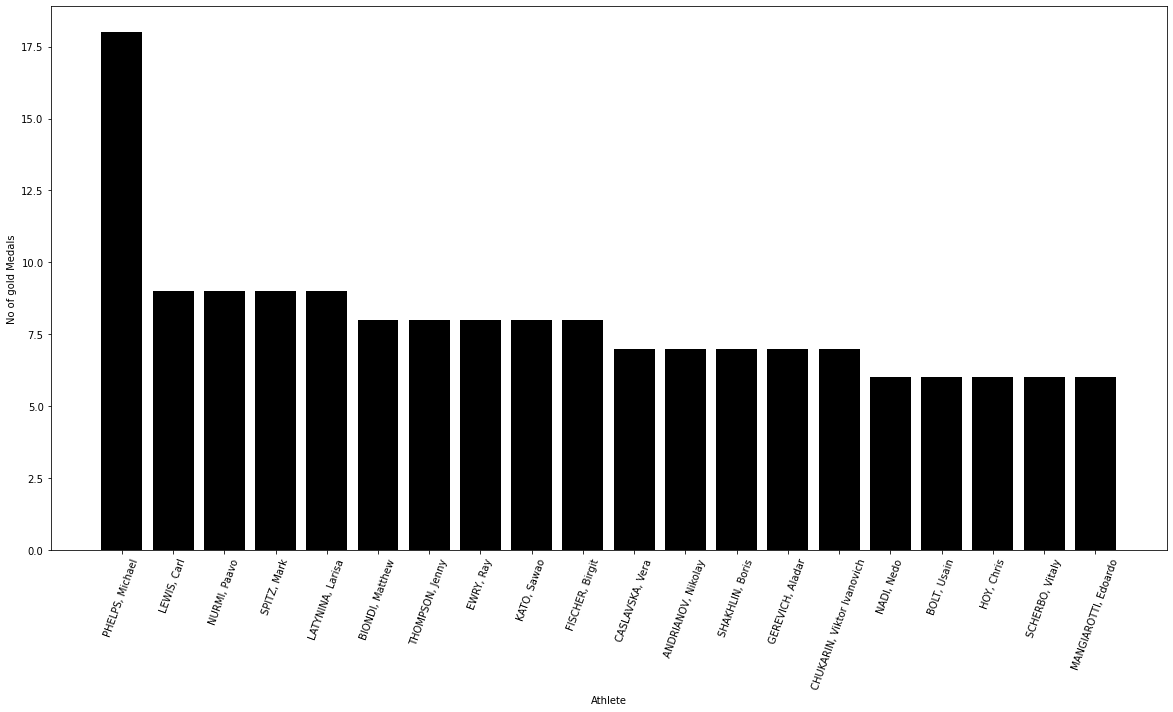

In [ ]:
graph = plt.figure(figsize=(20, 10))
plt.bar(play_gold_20['Athlete'], play_gold_20['Medal'], color='black')
plt.xlabel('Athlete')
plt.ylabel('No of gold Medals')
plt.xticks(rotation=70)
plt.show

###6. In which year India won first Gold Medal in Summer Olympics?

In [62]:
gold[gold['Country'] == 'IND'].sort_values(by='Year', ascending=True)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5526,1928,Amsterdam,Hockey,Hockey,"YUSUF, Sayed Mohamed",IND,Men,Hockey,Gold
5525,1928,Amsterdam,Hockey,Hockey,"SINGH, Jaipal",IND,Men,Hockey,Gold
5524,1928,Amsterdam,Hockey,Hockey,"SHAUKAT, Ali",IND,Men,Hockey,Gold
5523,1928,Amsterdam,Hockey,Hockey,"SEAMAN, Frederic S.",IND,Men,Hockey,Gold
...,...,...,...,...,...,...,...,...,...
16088,1980,Moscow,Hockey,Hockey,"AMARJIT RANA, Singh",IND,Men,Hockey,Gold
16087,1980,Moscow,Hockey,Hockey,"ALLAN, Schofield",IND,Men,Hockey,Gold
16102,1980,Moscow,Hockey,Hockey,"ZAFAR, Zafar",IND,Men,Hockey,Gold
16094,1980,Moscow,Hockey,Hockey,"KAUSHIK, Maharaj Krishon",IND,Men,Hockey,Gold


###7. Which event is most popular in terms on number of players? (Top 5)

In [ ]:
play_event = pd.DataFrame(df.groupby('Event', as_index=False, sort=True)['Athlete'].count())
play_event.sort_values(by='Athlete', ascending=False, inplace=True)
play_event

,Event,Athlete
477,Football,1497
489,Hockey,1422
614,Team Competition,1147
403,Basketball,1012
483,Handball,973
...,...,...
168,47.63 - 52.16KG (Bantamweight),2
424,Class B Up To 60 Feet,2
379,8M Class C,2
550,"Moving Bird Target, 50M",2


In [ ]:
play_event_20 = play_event.head(20)

<function matplotlib.pyplot.show>

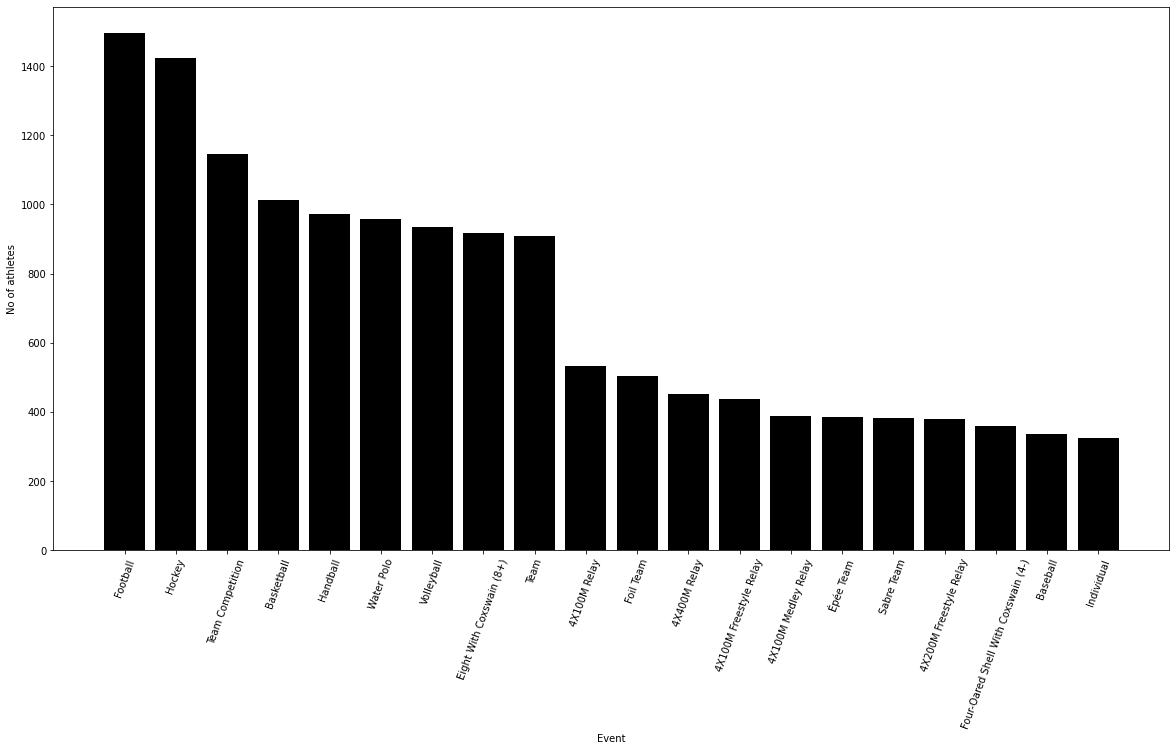

In [ ]:
graph = plt.figure(figsize=(20, 10))
plt.bar(play_event_20['Event'], play_event_20['Athlete'], color='black')
plt.xlabel('Event')
plt.ylabel('No of athletes')
plt.xticks(rotation=70)
plt.show

###8. Which sport is having most female Gold Medalists? (Top 5)

In [63]:
fem_gold = gold[gold['Gender'] == 'Women']
fem_gold

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold
...,...,...,...,...,...,...,...,...,...
31081,2012,London,Weightlifting,Weightlifting,"VALENTIN PEREZ, Lidia",ESP,Women,75KG,Gold
31097,2012,London,Wrestling,Wrestling Freestyle,"OBARA, Hitomi",JPN,Women,Wf 48 KG,Gold
31105,2012,London,Wrestling,Wrestling Freestyle,"YOSHIDA, Saori",JPN,Women,Wf 55 KG,Gold
31113,2012,London,Wrestling,Wrestling Freestyle,"ICHO, Kaori",JPN,Women,Wf 63 KG,Gold


In [ ]:
sport_fem = pd.DataFrame(fem_gold.groupby('Sport', as_index=False, sort=True)['Athlete'].count())
sport_fem.sort_values(by='Athlete', ascending=False, inplace=True)
sport_fem

,Sport,Athlete
0,Aquatics,589
2,Athletics,389
13,Gymnastics,268
18,Rowing,217
27,Volleyball,166
15,Hockey,144
14,Handball,142
4,Basketball,120
10,Fencing,108
11,Football,86


<function matplotlib.pyplot.show>

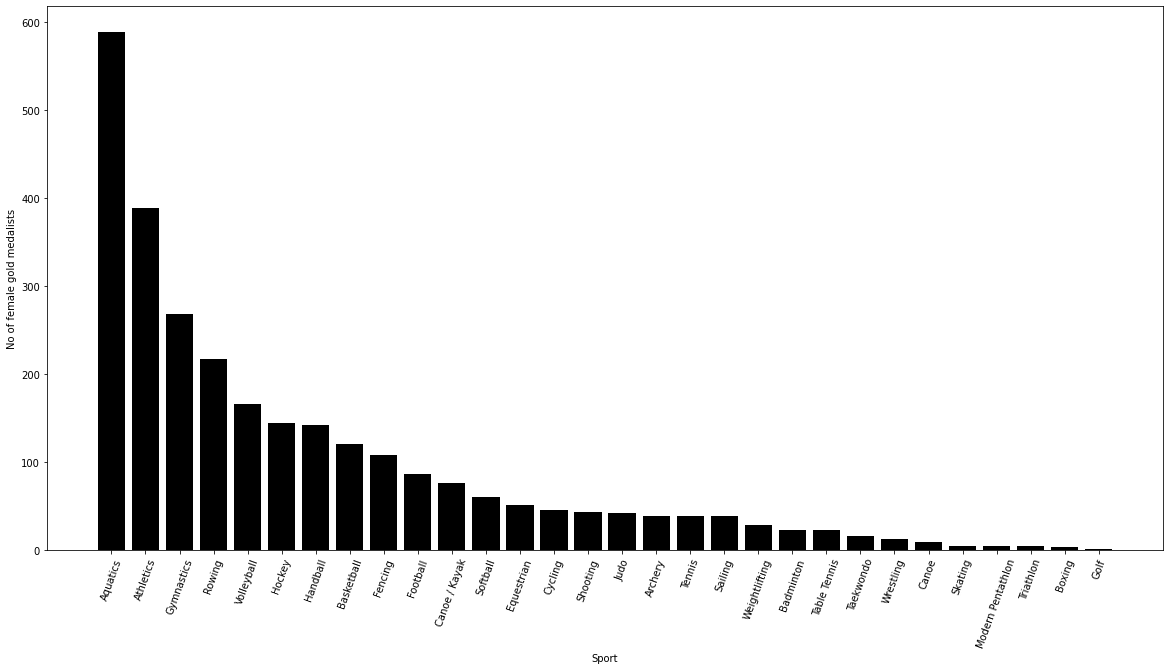

In [ ]:
graph = plt.figure(figsize=(20, 10))
plt.bar(sport_fem['Sport'], sport_fem['Athlete'], color='black')
plt.xlabel('Sport')
plt.ylabel('No of female gold medalists')
plt.xticks(rotation=70)
plt.show